# NICO2AI Lecture11 Reinforcement Learning I Exercise

## OpenAI Gym
- website https://gym.openai.com/

OpenAI Gym is the AI environment provided by OpenAI. It offers a lot of tasks. See [here](https://gym.openai.com/envs).

### multi-armed bandits
OpenAI Gym is easily extended by adding new tasks. Here we use a third-party [multi-armed bandits environment](https://github.com/JKCooper2/gym-bandits). In this case, reinforcement learning settings should be

- state: none
- reward: stochastic hit (0/1)
- action: bandit number out of 10
- value: hit rate

Let's see the following codes.

In [1]:
%matplotlib inline
import numpy as np
import gym
import gym_bandits
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

env = gym.make("BanditTenArmedRandomFixed-v0")

[2017-08-20 13:03:47,269] Making new env: BanditTenArmedRandomFixed-v0


Now you've made the gym environment instance. `gym` has the following interface.

### `gym.reset()`
resets environment.

#### return
- state: array value representing observations

### `gym.step(action)`
performs `action` at the current step.

#### return
- state: array value representing observations
- reward: float (integer) value representing reward
- done: boolean value representing the end of episode
- info: dictionary value representing debug information

Now you are ready to get into the bandit world. For the first exercise, fill blanks to make epsilon-greedy agent and change the epsilon value to see how it affects performance.

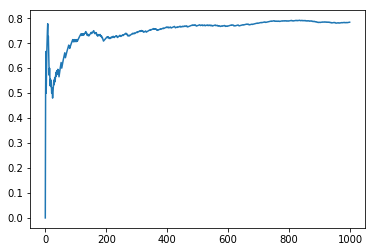

In [2]:
epsilon = 0.3
hit_count = 0
rates = []
data = []
for i in range(10):
    data.append({'hit': 0, 'count': 0})

def choose_action(data, epsilon):
    if random.random() < epsilon:
        return np.random.choice(10)
    rates = []
    for i, v in enumerate(data):
        rate = float(v['hit']) / (v['count'] + 1e-10)
        rates.append(rate)
    return np.argmax(rates)
    
env.reset()
for i in range(1000):
    action = choose_action(data, epsilon)
    _, reward, _, _ = env.step(action)
    data[action]['hit'] += reward
    data[action]['count'] += 1
    hit_count += reward
    rates.append(float(hit_count) / (i + 1))

plt.plot(np.arange(1000), np.array(rates))

Hooray! Now you've made simple reinforcement learning agent! Next, try making softmax exploration and change tau to see how it affects performance.

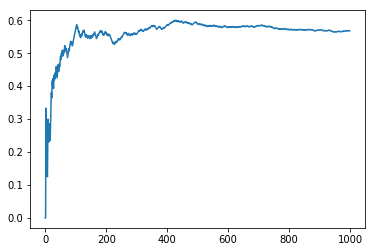

In [3]:
hit_count = 0
tau = 1.0
rates = []
data = []
for i in range(10):
    data.append({'hit': 0, 'count': 0})

def choose_action(data, epsilon):
    rates = []
    for v in data:
        rate = float(v['hit']) / (v['count'] + 1e-10)
        rates.append(rate / tau)
    dist = np.exp(rates) / np.sum(np.exp(rates))
    return np.random.choice(10, p=dist)
    
env.reset()
for i in range(1000):
    action = choose_action(data, epsilon)
    _, reward, _, _ = env.step(action)
    data[action]['hit'] += reward
    data[action]['count'] += 1
    hit_count += reward
    rates.append(float(hit_count) / (i + 1))

plt.plot(np.arange(1000), np.array(rates))

Finally, you have still UCB1 exploration. Let's make it!

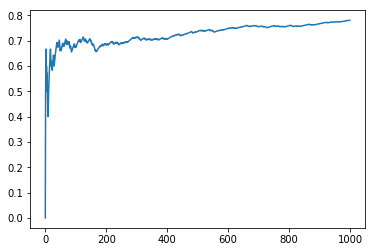

In [4]:
hit_count = 0
rates = []
data = []
for i in range(10):
    data.append({'hit': 0, 'count': 0})

def choose_action(data, epsilon):
    total_count = 0
    for v in data:
        total_count += v['count']
    if total_count == 0:
        return 0
    rates = []
    counts = []
    for v in data:
        rate = float(v['hit']) / (v['count'] + 1e-10)
        rates.append(rate)
        counts.append(v['count'] + 1e-10)
    b = rates + np.sqrt(2 * np.log(total_count + 1e-10) / np.array(counts))
    return np.argmax(b)
    
env.reset()
for i in range(1000):
    action = choose_action(data, epsilon)
    _, reward, _, _ = env.step(action)
    data[action]['hit'] += reward
    data[action]['count'] += 1
    hit_count += reward
    rates.append(float(hit_count) / (i + 1))

plt.plot(np.arange(1000), np.array(rates))

Congratulation!! You've done all exercise of lecture11!!